In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

model_data = pd.read_csv('cleaned_data.csv')
model_data

,price,rooms,area,build_year,condition,energy_mark,bedrooms,prepayment,floor,total_floors,...,balcony,yard,terrace,parking,has_internet,has_security_door,has_video_surveillance,has_storage,has_advance_payment,description_header_is_all_caps
0,750.0,2.0,42.1,1807.0,4.0,NaN,NaN,NaN,1.0,3.0,...,False,False,False,False,True,True,False,False,False,True
1,595.0,3.0,58.7,2005.0,3.0,NaN,2.0,NaN,3.0,5.0,...,True,False,False,True,True,True,False,False,True,False
2,670.0,2.0,72.0,NaN,4.0,NaN,1.0,NaN,4.0,4.0,...,True,True,False,True,True,True,False,True,False,NaN
3,550.0,1.0,24.0,2023.0,5.0,7.0,1.0,550.0,3.0,4.0,...,False,False,False,True,False,False,False,True,False,False
4,800.0,2.0,48.1,2020.0,3.0,NaN,1.0,NaN,1.0,4.0,...,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,540.0,2.0,41.9,2018.0,5.0,NaN,1.0,NaN,1.0,1.0,...,False,False,False,True,True,False,False,False,True,NaN
1866,790.0,2.0,45.8,2022.0,5.0,7.0,1.0,NaN,2.0,4.0,...,True,False,False,False,False,True,False,True,False,True
1867,459.0,1.0,21.0,2019.0,5.0,NaN,NaN,NaN,6.0,8.0,...,False,False,False,False,True,True,True,True,False,False
1868,500.0,1.0,32.9,1994.0,5.0,4.0,1.0,500.0,7.0,9.0,...,True,False,False,True,True,True,True,False,False,True


In [135]:
import seaborn as sns

model_data = pd.get_dummies(model_data, columns=['mun_or_city']) 
model_data
X = model_data.drop(columns=['price'])
Y = model_data['price']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

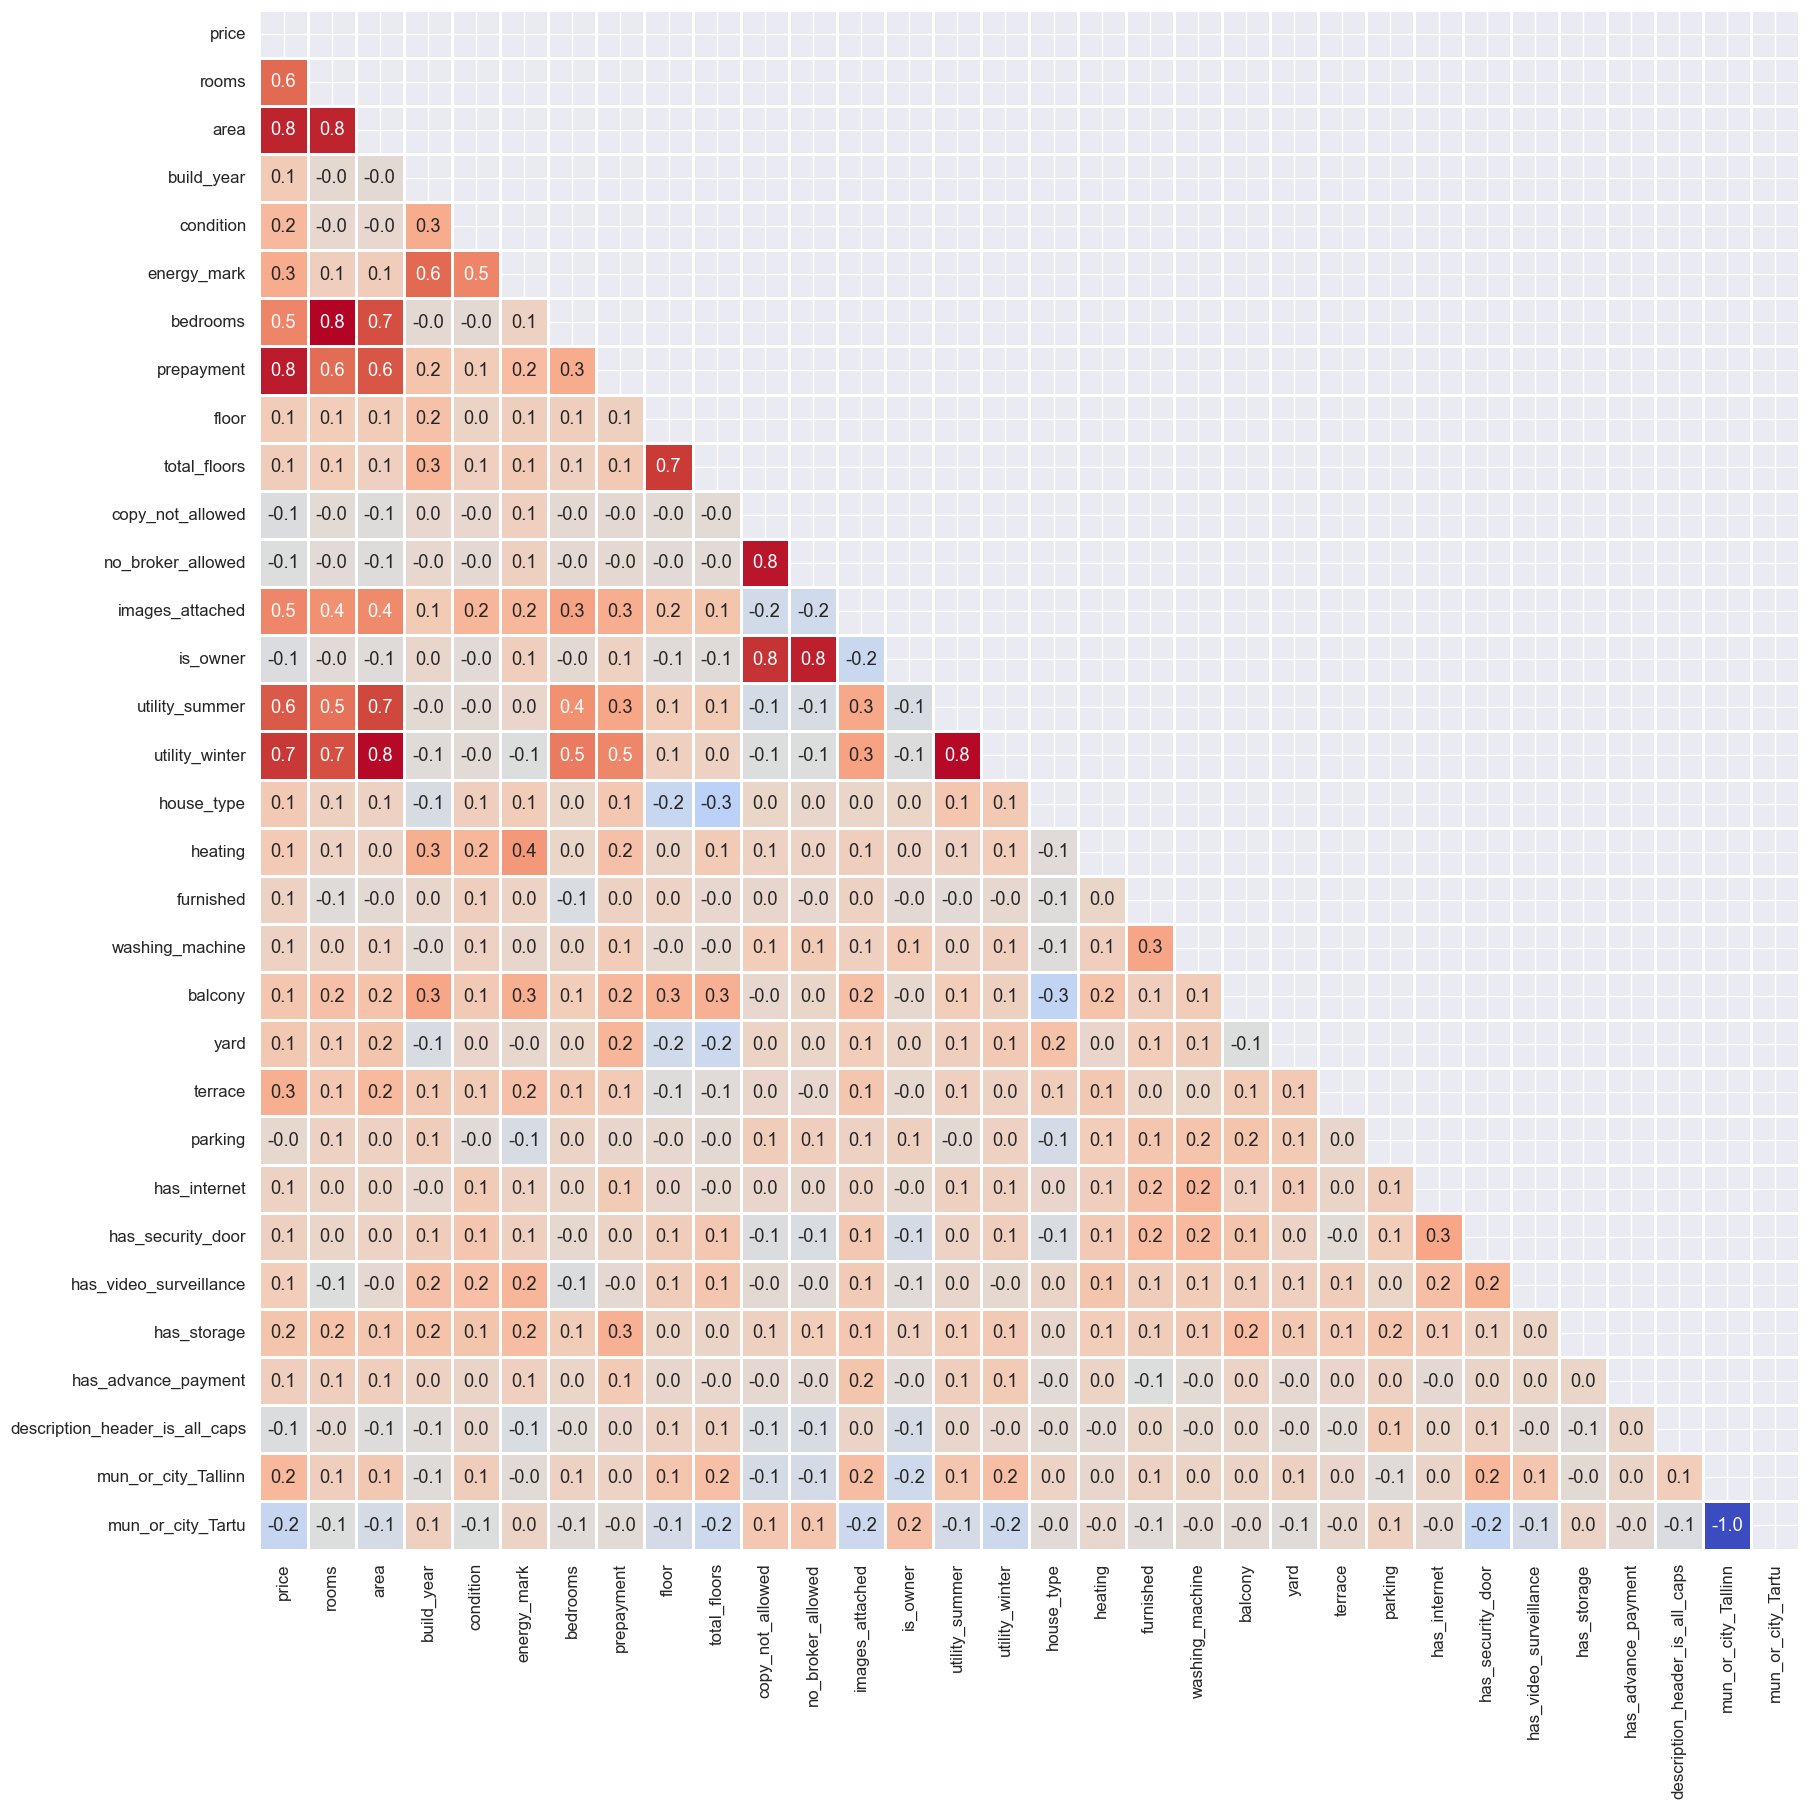

In [85]:
sns.set(font_scale=1.1)
correlation_train = model_data.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

In [107]:
model_data.isna().sum()

price                                0
rooms                                6
area                                 0
build_year                         387
condition                          161
energy_mark                        921
bedrooms                           523
prepayment                        1531
floor                              125
total_floors                       125
copy_not_allowed                     0
no_broker_allowed                    0
images_attached                      2
is_owner                             0
utility_summer                    1251
utility_winter                    1251
house_type                         459
heating                            275
furnished                            0
washing_machine                      0
balcony                              0
yard                                 0
terrace                              0
parking                              0
has_internet                         0
has_security_door        

In [139]:

model_lasso = Lasso(alpha=0.5)  

model_lasso.fit(X_train, Y_train)

Y_pred = model_lasso.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"Lasso Regression - Mean Squared Error: {mse}")
print(f"Lasso Regression - Root Mean Square Deviation (RMSD): {rmse}")

Lasso Regression - Mean Squared Error: 89702.11447694951
Lasso Regression - Root Mean Square Deviation (RMSD): 299.503112633157
